In [1]:
import pandas as p
from pandas import DataFrame
import numpy as n
import matplotlib.pyplot as m
from random import *
import math as math
from collections import defaultdict

In [2]:
training_data = p.read_csv("train-features.txt",header= None,sep =' ',names = ["MessageIndex", "WordIndex", "#Occurances"])
training_data.head()

,MessageIndex,WordIndex,#Occurances
0,1,19,2
1,1,45,1
2,1,50,1
3,1,75,1
4,1,85,1


### Read Training label - spam or ham

In [3]:
label = p.read_csv("train-labels.txt",header= None,names=["Spam/Ham"])
label.insert(0, "#Message", range(1, 1 + len(label)))

In [4]:
num_spam = len(label[label["Spam/Ham"]==0])
num_ham = len(label[label["Spam/Ham"]==1])

total_msgs = len(label)
print(num_spam,num_ham,total_msgs)

350 350 700


### Create dictionaries for spam and ham messages

In [5]:
spam_dict = defaultdict(int)
ham_dict = defaultdict(int) 
for i,row in training_data.iterrows():
    if(label["Spam/Ham"].values[row["MessageIndex"]-1] == 1):
        spam_dict[row["WordIndex"]]+=row["#Occurances"]
    elif(label["Spam/Ham"].values[row["MessageIndex"]-1] == 0):
        ham_dict[row["WordIndex"]]+=row["#Occurances"]


### Probabilities of each word using laplace smoothing

In [6]:
p_spam = defaultdict(int)
p_ham = defaultdict(int) 

for i in spam_dict:
    p_spam[i] = (spam_dict[i]+1)/(num_spam+2)
    
for i in ham_dict:
    p_ham[i] = (ham_dict[i]+1)/(num_ham+2)
    if p_ham[i] == 0:
        print (p_ham[i])

### Read test data


In [7]:
test_data = p.read_csv("test-features.txt",header= None, sep =' ',names = ["MessageIndex", "WordIndex", "#Occurances"])
test_label = p.read_csv("test-labels.txt",header= None,names=["Spam/Ham"])
test_label.insert(0, "#Message", range(1, 1 + len(test_label)))

# Find prob of spam and ham in test ie., P(Spam) &  P(Ham)
num_spam_test = len(test_label[test_label["Spam/Ham"]==0])
num_ham_test = len(test_label[test_label["Spam/Ham"]==1])
total_test = len(test_label)

pos = num_spam_test/total_test
poh = num_ham_test/total_test
print("P(Spam)",pos)
print("P(Ham)",poh)

P(Spam) 0.5
P(Ham) 0.5


In [8]:
pos_f =0
poh_f =0
msg =0
spam = defaultdict(int)

for itr,row in test_data.iterrows():
    if(msg != row["MessageIndex"]):
        if ((pos_f + math.log(pos)) > (poh_f + math.log(poh))):
            spam[msg] = 1
        else:
            spam[msg] = 0
        pos_f = 0
        poh_f = 0
    
    msg =  row["MessageIndex"]
    
    
    px_gs =  spam_dict[row["WordIndex"]] + 1 ) / (num_spam + 2) 
    px_gh =  p_ham[row["WordIndex"]]
    
    if px_gs == 0:
        px_gs = 1 / (num_spam + 2)
    if px_gh == 0:
        px_gh = 1 / (num_ham + 2)
       
    
    #To avoid MAP underflow
    pos_f = pos_f + (math.log(px_gs))
    poh_f = poh_f + (math.log(px_gh))


if((pos_f + math.log(pos)) > (poh_f + math.log(poh))):
    spam[msg] = 1
else:
    spam[msg] = 0
    
print(spam) 
    

defaultdict(<class 'int'>, {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 1, 39: 0, 40: 0, 41: 1, 42: 0, 43: 0, 44: 0, 45: 0, 46: 1, 47: 1, 48: 0, 49: 0, 50: 0, 51: 1, 52: 1, 53: 0, 54: 0, 55: 1, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 1, 76: 0, 77: 0, 78: 1, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 1, 132: 1, 133: 1, 134: 1, 13

In [9]:
spam.pop(0)
result = p.DataFrame.from_dict(spam, orient="index")
result.columns = ["Spam/Ham"]
result.insert(0, "#Message", range(1, 1 + len(spam)))


In [10]:
correct = n.sum(result["Spam/Ham"].values == test_label["Spam/Ham"].values)
accuracy = correct/len(result)
accuracy*100

print("ACCURACY:",accuracy*100)

ACCURACY: 96.53846153846153


**************** Prediction**********************


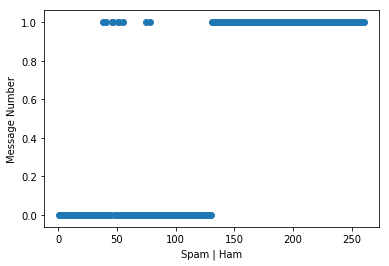

**************** Testing Data **********************


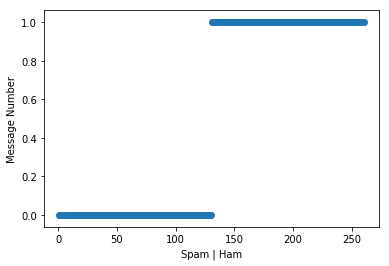

In [11]:
print("**************** Prediction**********************")
m.scatter(test_label["#Message"],result["Spam/Ham"])
m.xlabel("Spam | Ham")
m.ylabel("Message Number")
m.show()
print("**************** Testing Data **********************")
m.scatter(test_label["#Message"],test_label["Spam/Ham"])
m.xlabel("Spam | Ham")
m.ylabel("Message Number")
m.show()